In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import numpy as np
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# EDA

### Understanding the dataset

In [ ]:
# pd.read_csv is used to read your dataset(i.e in csv)
df=pd.read_csv("/content/drive/MyDrive/Internship/loan_approval_dataset.csv")

In [ ]:
# return top 5 rows of dataset
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# return last 5 rows of dataset
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [ ]:
# return random 5 rows of dataset
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4117,4118,1,Graduate,Yes,3500000,13100000,10,477,3200000,6200000,7500000,3100000,Rejected
2424,2425,3,Not Graduate,Yes,6100000,22800000,18,640,16800000,7300000,19600000,6000000,Approved
2875,2876,5,Not Graduate,Yes,300000,1100000,20,613,600000,400000,700000,200000,Approved
1999,2000,3,Not Graduate,Yes,3100000,6300000,18,895,2300000,3400000,10500000,4200000,Approved
3030,3031,5,Not Graduate,No,9000000,34300000,10,853,22500000,11900000,32200000,10100000,Approved


In [ ]:
df.shape # Return dimesion of dataset

(4269, 13)

In [ ]:
df.info() # Shows all columns name,non-null count and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df.columns # return all columns name

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

### Checking all null values and duplicate values

In [ ]:
df.isna().sum() # to check total number of null values

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
df.duplicated() # to check duplicate values

0       False
1       False
2       False
3       False
4       False
        ...  
4264    False
4265    False
4266    False
4267    False
4268    False
Length: 4269, dtype: bool

In [ ]:
df.duplicated().sum() # return how many duplicate value are there in numbers

0

In [ ]:
unique=df.select_dtypes(include=object).nunique() # to check the unique value in object data types

In [ ]:
print(unique)

 education        2
 self_employed    2
 loan_status      2
dtype: int64


In [ ]:
df.drop(columns={'loan_id'},inplace=True) # it will remove the column (i.e loan_id)

In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True) # it remove the spaces in column to make it more validate

In [ ]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [ ]:
df.dtypes # return all data types of all columns

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [ ]:
df['loan_status'].value_counts() # to check the balance as (approved is more than Rejected )

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [ ]:
df['loan_status'].value_counts()/df.shape[0]*100 # it return the overall value in column in percentage

loan_status
 Approved    62.215976
 Rejected    37.784024
Name: count, dtype: float64

In [ ]:
df.describe().T # shows the summary stats of your dataset only where datatype is int o float

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [ ]:
df.describe(include=object).T # shows the summary stats of your dataset which only include object datatype

,count,unique,top,freq
education,4269,2,Graduate,2144
self_employed,4269,2,Yes,2150
loan_status,4269,2,Approved,2656


In [ ]:
# to check unique value in all object data type using for loop
for i in df.select_dtypes(include=object):
  uni=df[i].value_counts()
  print(uni)
  print()


education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64



In [ ]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [ ]:
df.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

### Data visualization

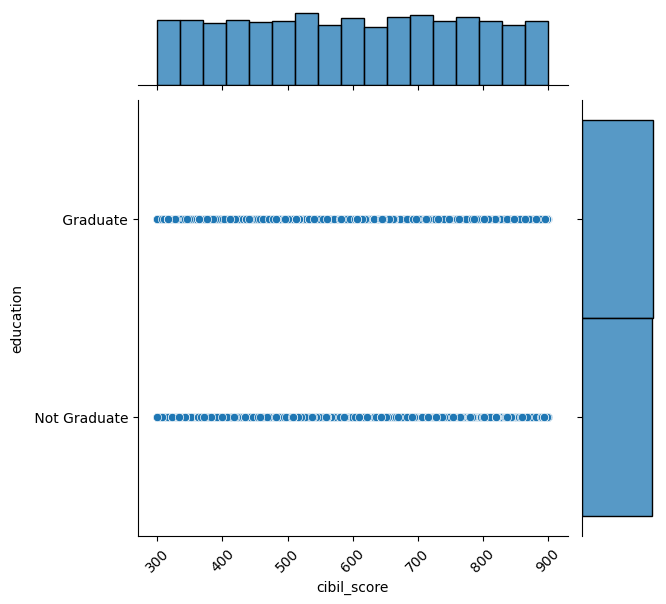

In [ ]:
# using seaborn library to see the relation between Graduation and Not Graduation how it affecting cibil score
sns.jointplot(data=df,x="cibil_score",y="education")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# show the relation of all columns
df.corr=df.select_dtypes(include=['int64','float']).corr()

In [ ]:
df.corr

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


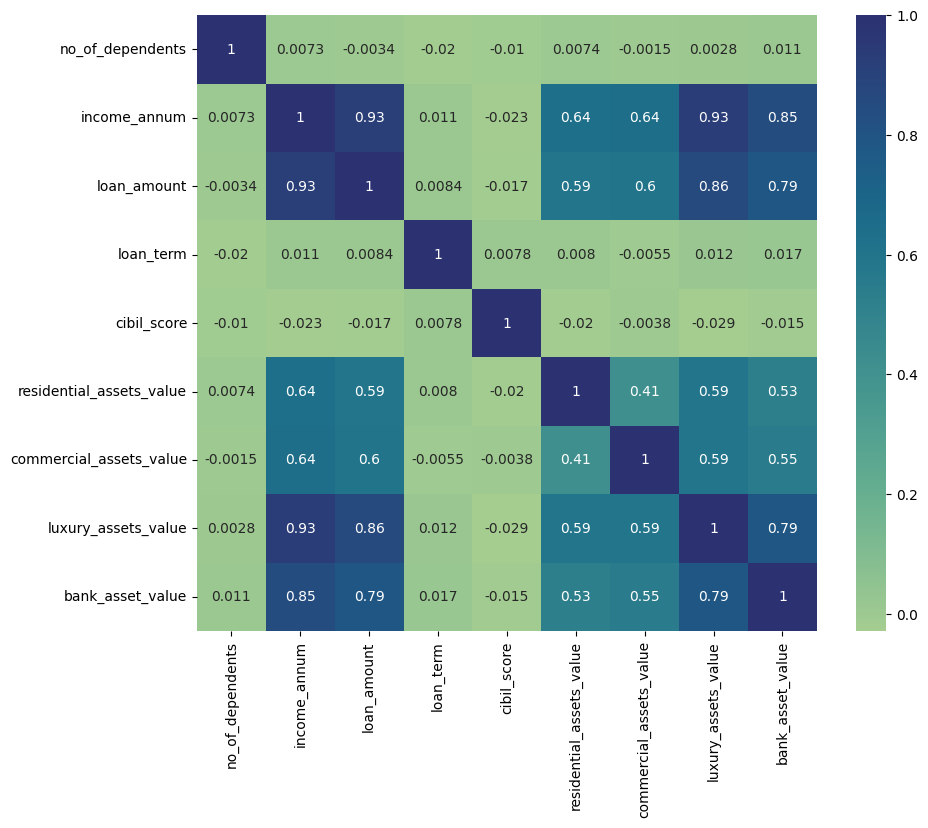

In [ ]:
# by using seaborn library we can see the more the darker box is more it is related to other columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr,annot=True,cmap="crest")
plt.xticks()
plt.show()

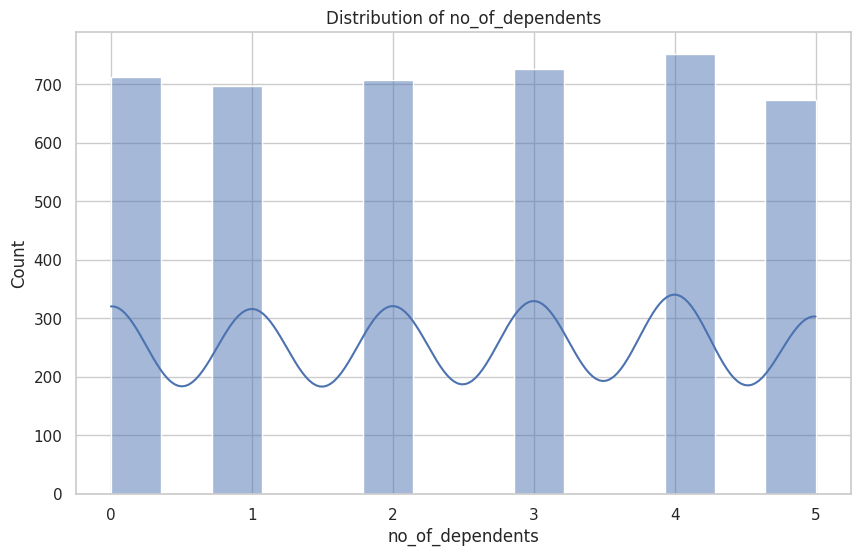

Axes(0.125,0.11;0.775x0.77)


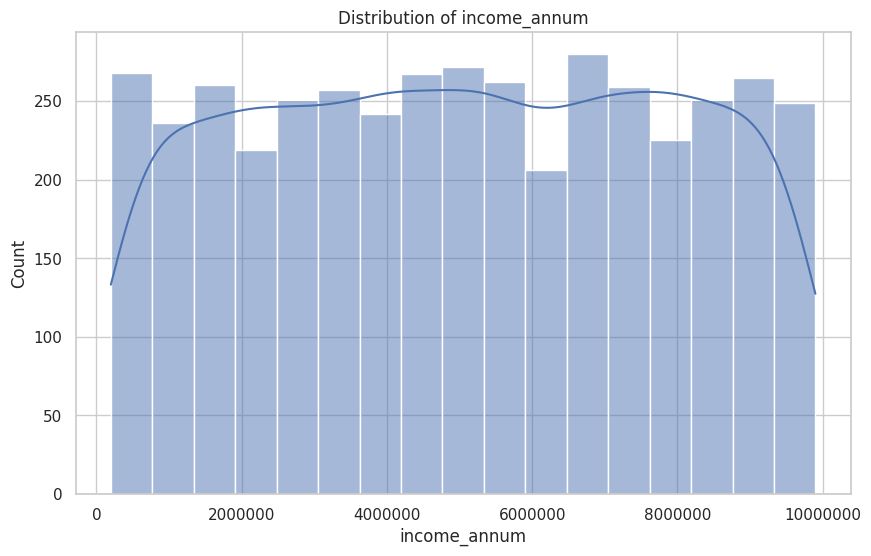

Axes(0.125,0.11;0.775x0.77)


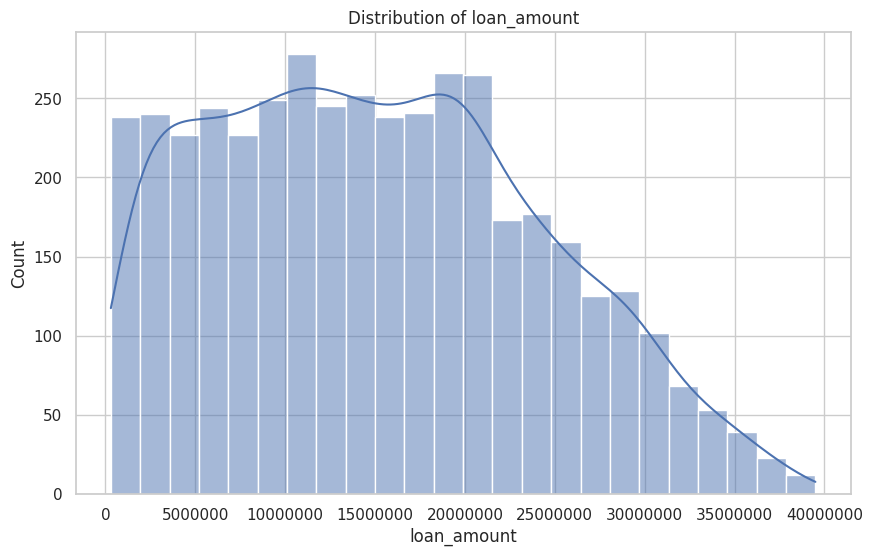

Axes(0.125,0.11;0.775x0.77)


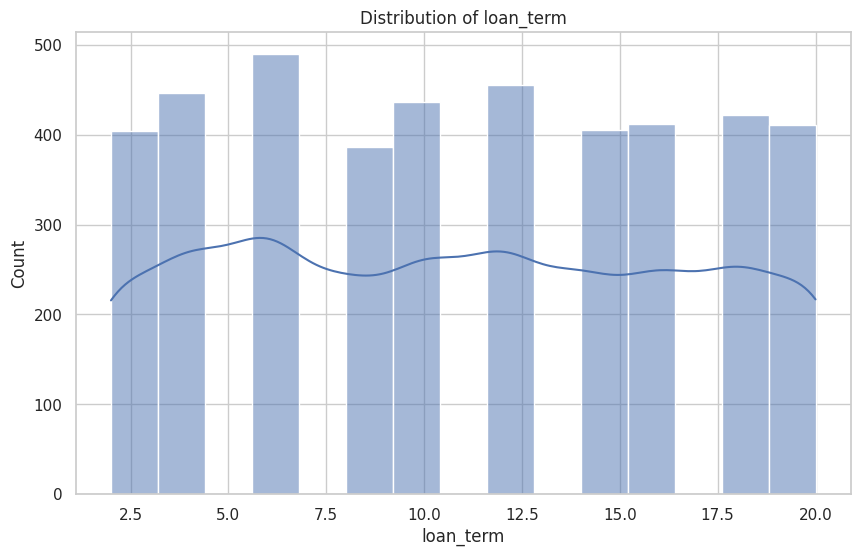

Axes(0.125,0.11;0.775x0.77)


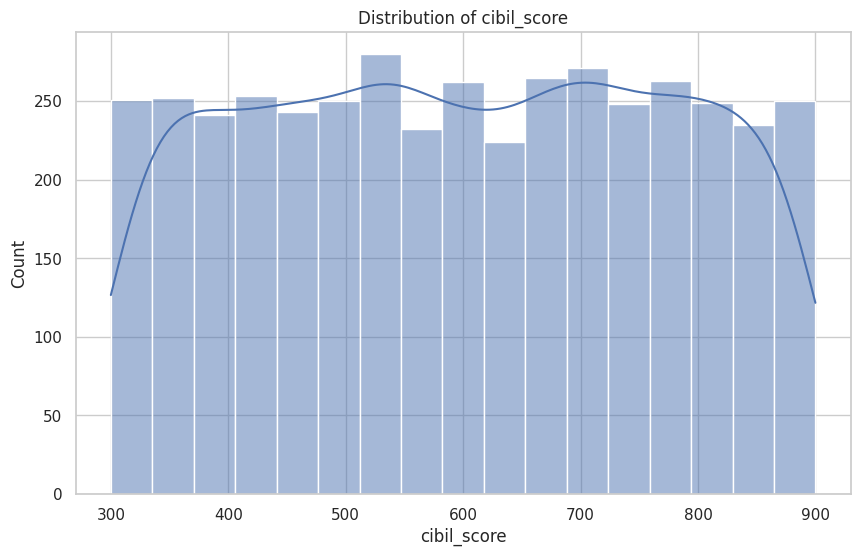

Axes(0.125,0.11;0.775x0.77)


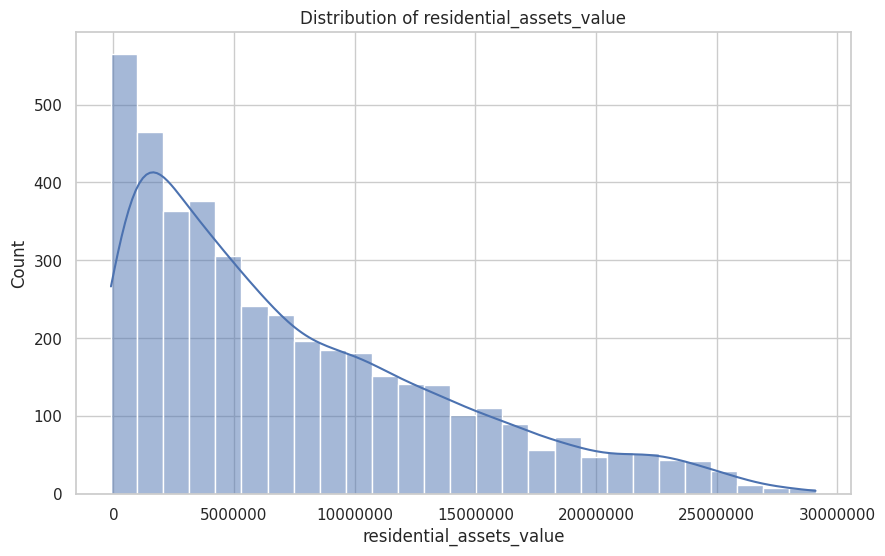

Axes(0.125,0.11;0.775x0.77)


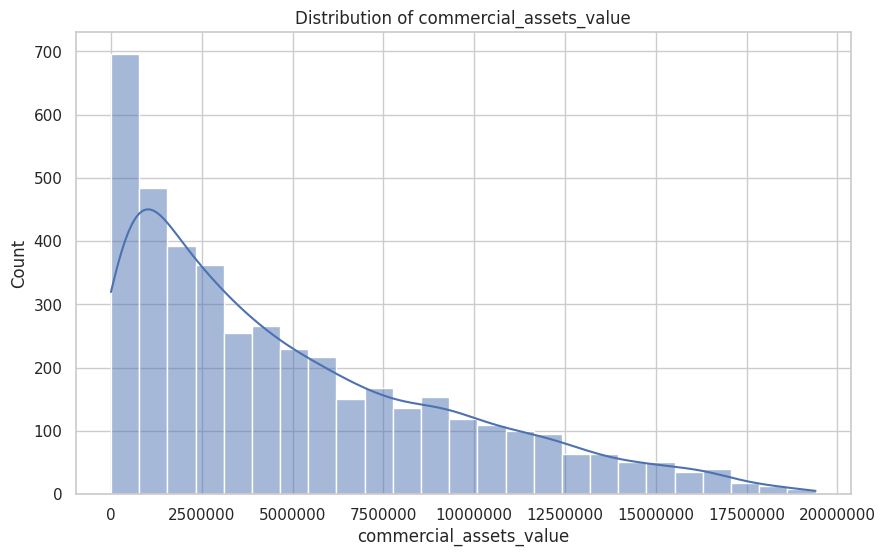

Axes(0.125,0.11;0.775x0.77)


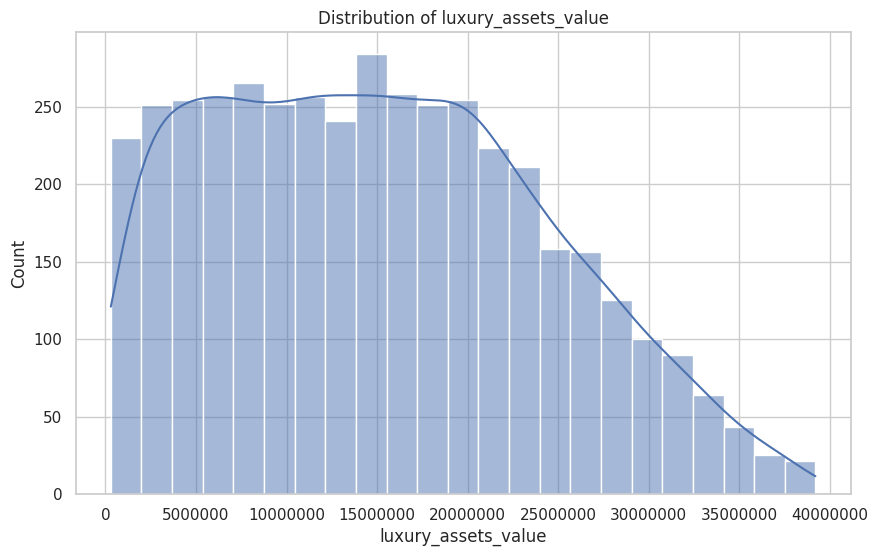

Axes(0.125,0.11;0.775x0.77)


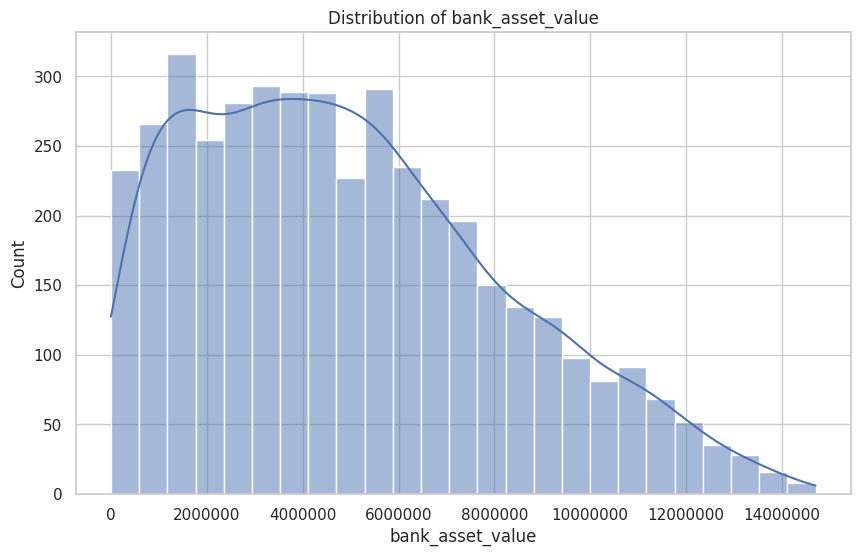

Axes(0.125,0.11;0.775x0.77)


In [ ]:
# to check the distribution of all coumns using histplot
for i in df.select_dtypes(include=['int64','float']):
  sns.set(style="whitegrid")
  plt.figure(figsize=(10,6))
  his=sns.histplot(df[i],kde=True)
  plt.title(f"Distribution of {i}")
  plt.ticklabel_format(style='plain', axis='x')
  plt.show()
  print(his)

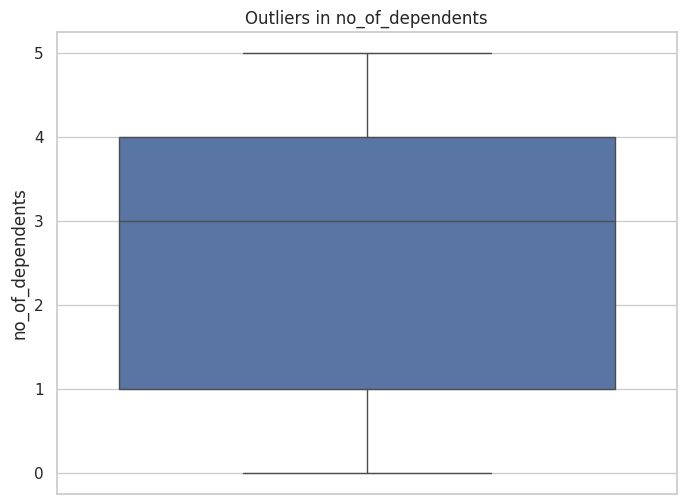

Axes(0.125,0.11;0.775x0.77)


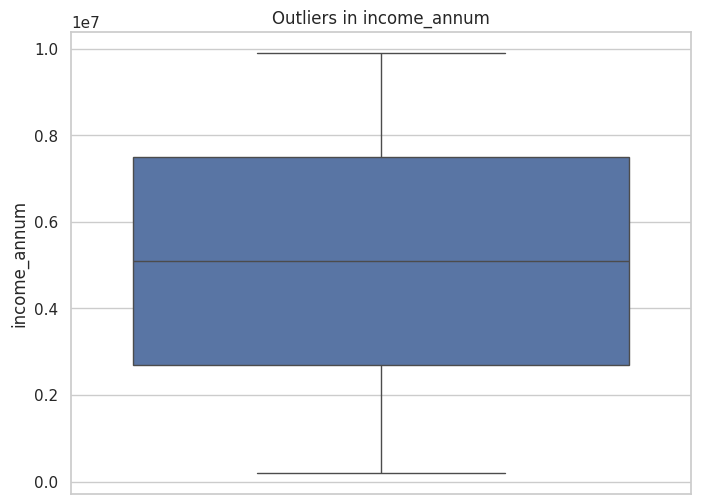

Axes(0.125,0.11;0.775x0.77)


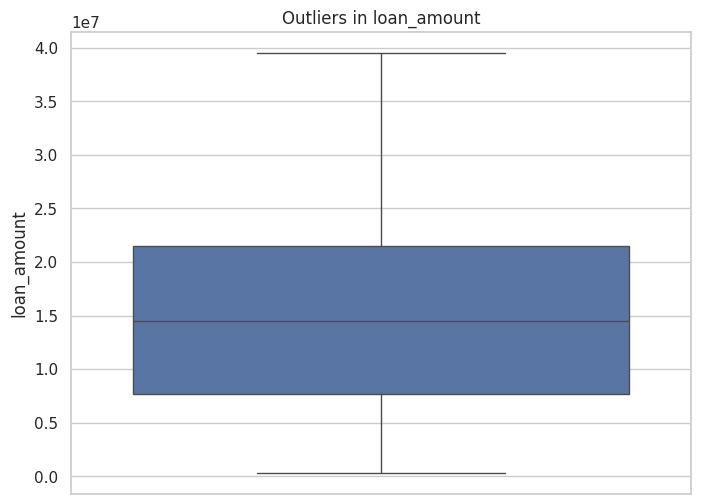

Axes(0.125,0.11;0.775x0.77)


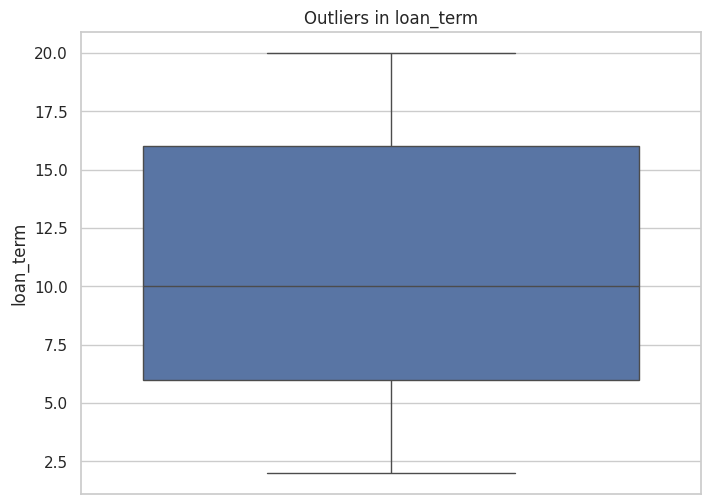

Axes(0.125,0.11;0.775x0.77)


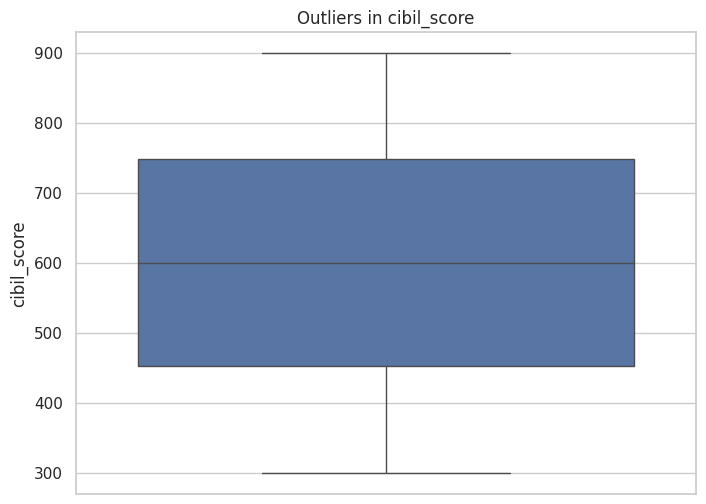

Axes(0.125,0.11;0.775x0.77)


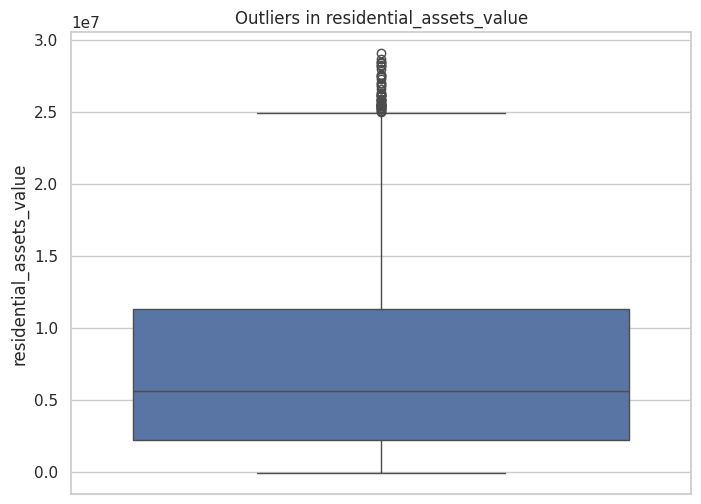

Axes(0.125,0.11;0.775x0.77)


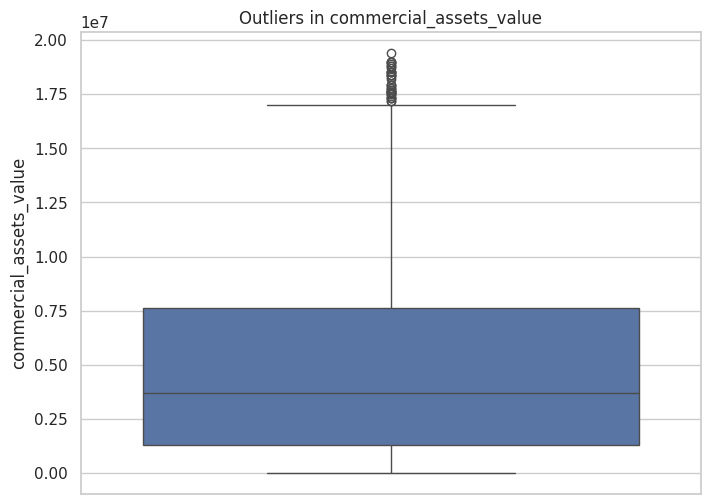

Axes(0.125,0.11;0.775x0.77)


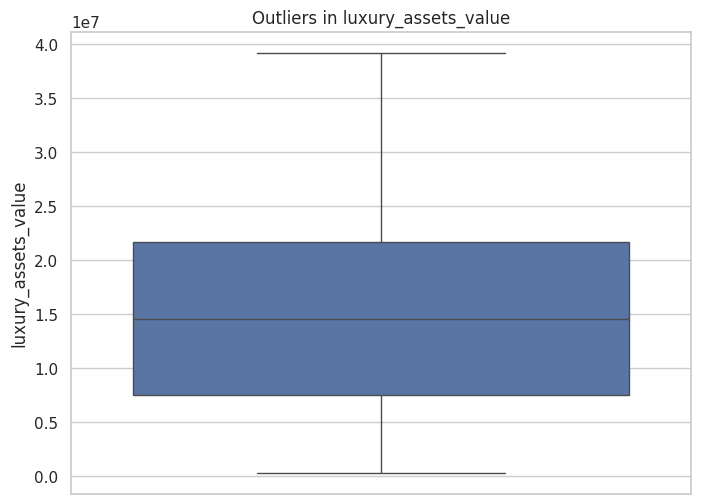

Axes(0.125,0.11;0.775x0.77)


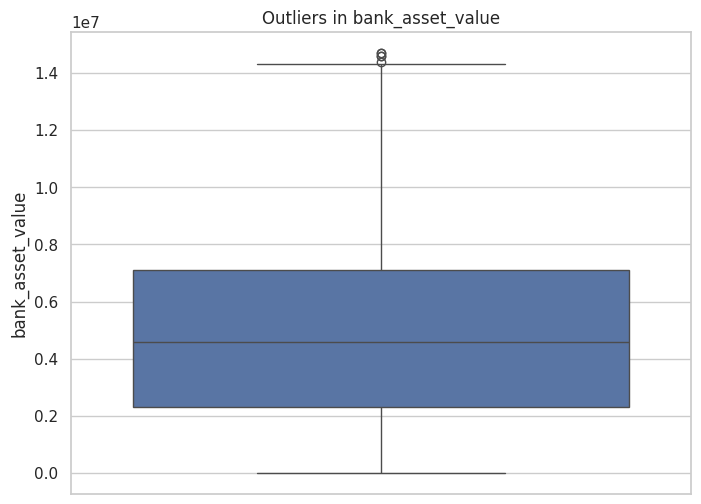

Axes(0.125,0.11;0.775x0.77)


In [ ]:
# to check the outliers in datatset which include datatype having int and float
for i in df.select_dtypes(include=['int64','float']):
  plt.figure(figsize=(8,6))
  out=sns.boxplot(df[i])
  plt.title(f"Outliers in {i}")
  plt.show()
  print(out)

<Axes: xlabel='loan_status', ylabel='cibil_score'>

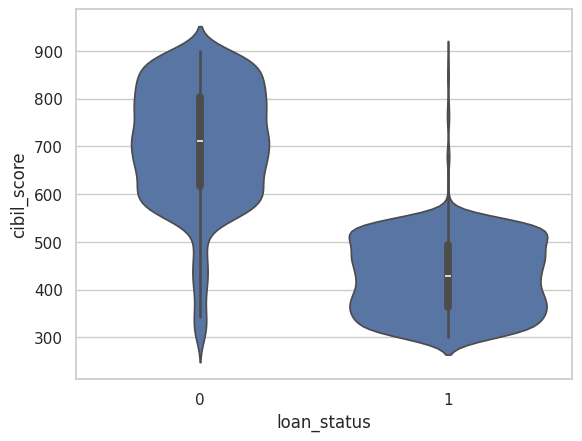

In [ ]:
sns.violinplot(x='loan_status', y='cibil_score', data=df)

<ipython-input-31-a887ece73108>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],palette='viridis',width=0.4)


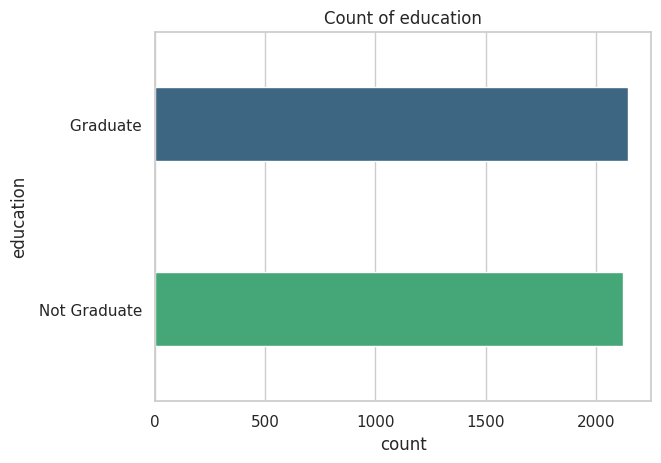

Axes(0.125,0.11;0.775x0.77)


<ipython-input-31-a887ece73108>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],palette='viridis',width=0.4)


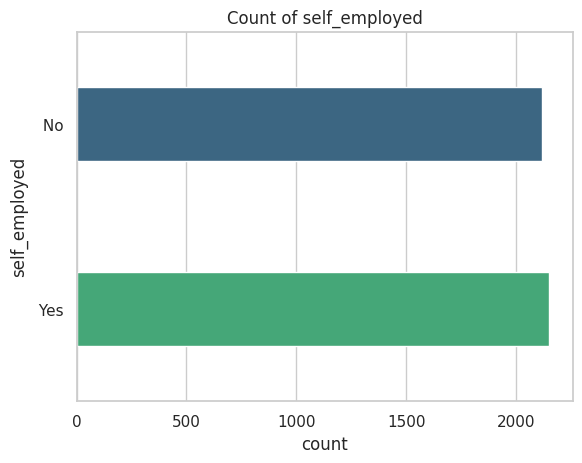

Axes(0.125,0.11;0.775x0.77)


<ipython-input-31-a887ece73108>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],palette='viridis',width=0.4)


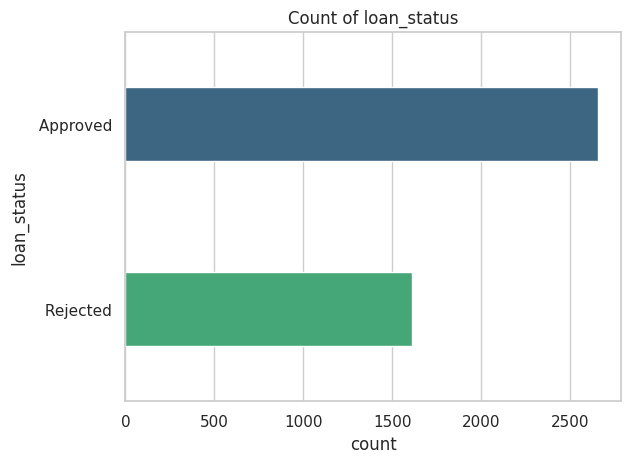

Axes(0.125,0.11;0.775x0.77)


In [ ]:
# using seaborn library to see the total count of object column
for i in df.select_dtypes(include=object):
  count=sns.countplot(df[i],palette='viridis',width=0.4)
  plt.title(f"Count of {i}")
  plt.show()
  print(count)

Text(0.5, 1.0, 'Total status Category by gender')

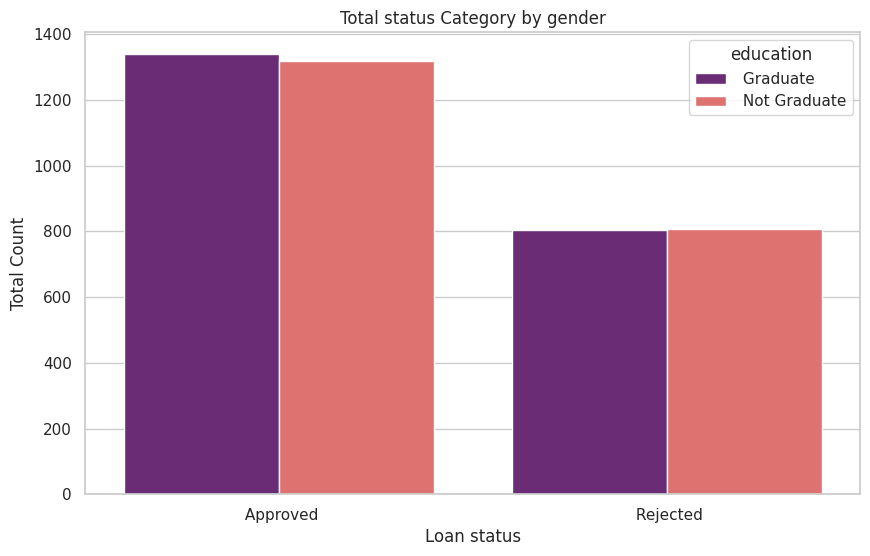

In [ ]:
# comparing the staudents of graduate and non graduate how many have got the approved of getting loan
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='loan_status',hue="education",palette="magma")
plt.xlabel("Loan status")
plt.ylabel("Total Count")
plt.title("Total status Category by gender")

Text(0.5, 1.0, 'Loan approved whether they are self employed or not')

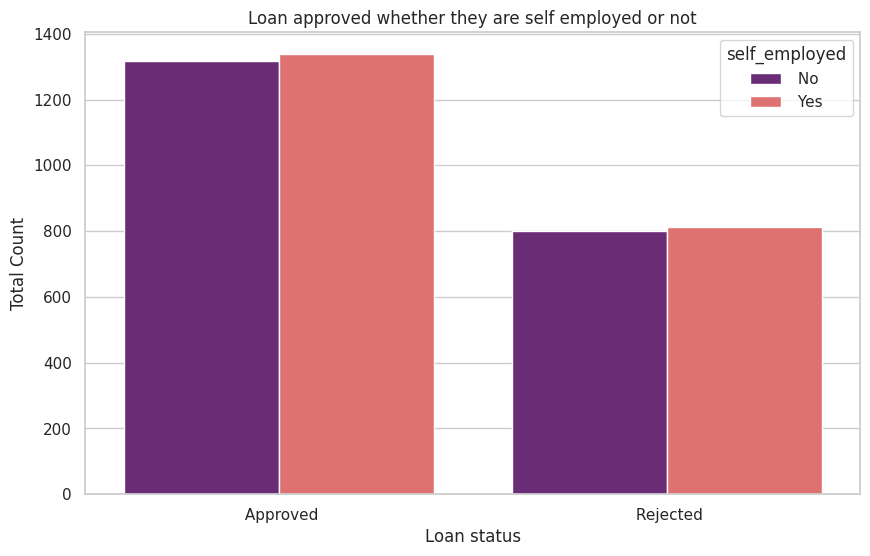

In [ ]:
# comparing the self emploed with not having self emploed with laon approval
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='loan_status',hue="self_employed",palette="magma")
plt.xlabel("Loan status")
plt.ylabel("Total Count")
plt.title("Loan approved whether they are self employed or not")

In [ ]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

### Checking Outliers

In [ ]:
# to check the outliers in datsaset using IQR with for loop
for outliers in df.select_dtypes(include={"int64","float"}):
  Q1=df[outliers].quantile(0.25)
  Q3=df[outliers].quantile(0.75)
  print(f"{outliers} percentile")
  print(f"25th percentile is {Q1}")
  print(f"75th percentile is {Q3}")
  IQR=Q3-Q1
  LL=Q1 - 1.5*  IQR
  UL=Q3 + 1.5 * IQR
  print(f"IQR of {outliers} {IQR}" )
  print(f"Range of Normal values {LL,UL}")
  print()

Outliers=(df[(df[outliers]<LL) | (df[outliers]>UL)])


no_of_dependents percentile
25th percentile is 1.0
75th percentile is 4.0
IQR of no_of_dependents 3.0
Range of Normal values (-3.5, 8.5)

income_annum percentile
25th percentile is 2700000.0
75th percentile is 7500000.0
IQR of income_annum 4800000.0
Range of Normal values (-4500000.0, 14700000.0)

loan_amount percentile
25th percentile is 7700000.0
75th percentile is 21500000.0
IQR of loan_amount 13800000.0
Range of Normal values (-13000000.0, 42200000.0)

loan_term percentile
25th percentile is 6.0
75th percentile is 16.0
IQR of loan_term 10.0
Range of Normal values (-9.0, 31.0)

cibil_score percentile
25th percentile is 453.0
75th percentile is 748.0
IQR of cibil_score 295.0
Range of Normal values (10.5, 1190.5)

residential_assets_value percentile
25th percentile is 2200000.0
75th percentile is 11300000.0
IQR of residential_assets_value 9100000.0
Range of Normal values (-11450000.0, 24950000.0)

commercial_assets_value percentile
25th percentile is 1300000.0
75th percentile is 76000

In [ ]:
# Total outliers in our dataset
Outliers

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
200,4,Not Graduate,Yes,9800000,21200000,20,355,22000000,8900000,31800000,14400000,Rejected
1272,5,Not Graduate,No,9900000,35800000,20,470,9500000,18400000,39100000,14700000,Rejected
1633,0,Graduate,Yes,9800000,23200000,10,573,23900000,3300000,23600000,14600000,Approved
1674,1,Not Graduate,No,9800000,21300000,2,356,23000000,12300000,25700000,14600000,Rejected
1805,5,Not Graduate,No,9900000,33600000,20,580,7000000,10800000,37400000,14700000,Approved


In [ ]:
Total=len(Outliers)

In [ ]:
print("Total Outliers in our dataset is ",Total)

Total Outliers in our dataset is  5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [ ]:
df.head() # Approved 0 and rejected 1

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# to convert the object dataset in numerical format
df[["education","self_employed","loan_status"]]=df[["education","self_employed","loan_status"]].apply(LabelEncoder().fit_transform)

In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


### Train_test_split

In [ ]:
# to drop the loan_status column from X and just including loan_status column for y
X=df.drop(columns={"loan_status"})
y=df['loan_status']

In [ ]:
y.value_counts() # 0 Approved 1 Rejected

loan_status
0    2656
1    1613
Name: count, dtype: int64

In [ ]:
# splitting the datatset of X and y so that we can check how much model is accurate
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=44)

print(f" Total Data of X is {X.shape}\n 80% for Training data {X_train.shape}\n 20% for Testing,{X_test.shape}")

 Total Data of X is (4269, 11)
 80% for Training data (3415, 11)
 20% for Testing,(854, 11)


### Applying Standard Scalar

In [ ]:
# using standar scalar to scaled the dataset in equal terms
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

### Logistic Regression

In [ ]:
# Logistic Regression
lr=LogisticRegression()

In [ ]:
# it training your dastset
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# predicting the values using Logistic Regression
y_pred_lr=lr.predict(X_test)

In [ ]:
#prediction usig Logistic regression
y_pred_lr

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [ ]:
y_test

3070    0
1617    1
2114    0
3588    1
3418    0
       ..
830     0
155     0
704     0
3960    1
3187    0
Name: loan_status, Length: 854, dtype: int64

In [ ]:
# it shows how much it is accurate it is
accuracy_lr=accuracy_score(y_test,y_pred_lr)

In [ ]:
print("Accuracy of Logistic regression is ",accuracy_lr*100)

Accuracy of Logistic regression is  73.88758782201405


In [ ]:
# confusion matrix show where the prediction gone wrong it focuses on Right value prediction
cm=confusion_matrix(y_test,y_pred_lr)

In [ ]:
# confusion matric of lofistic Regression
cm

array([[504,  27],
       [196, 127]])

Text(46.25, 0.5, 'True Value')

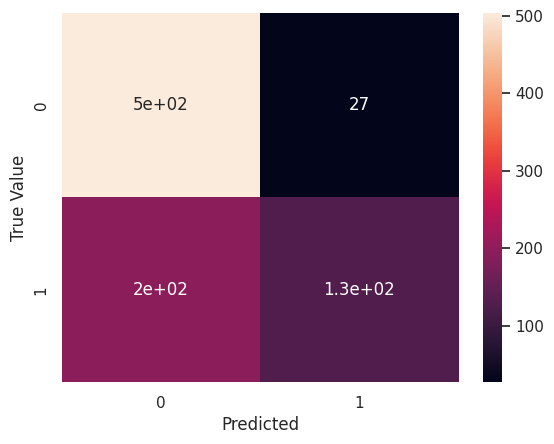

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True Value")

In [ ]:
# Evaluation matrix for Logistic Regression to improve the perfromace ,report of Logistic Regression
Report_nb=classification_report(y_test,y_pred_lr)
print(Report_nb)

              precision    recall  f1-score   support

           0       0.72      0.95      0.82       531
           1       0.82      0.39      0.53       323

    accuracy                           0.74       854
   macro avg       0.77      0.67      0.68       854
weighted avg       0.76      0.74      0.71       854



### Logistic Regression with Standard Scalar

In [ ]:
# Logistic regression with standard scalar

In [ ]:
# here we are traiing the data but data where we apply standard scaler
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
# Prediction of datset of standerd scaler
y_pred_lr_s=lr.predict(X_test_scaled)

In [ ]:
# prediction with Logistic Regression using standerd scalar
y_pred_lr_s

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,

In [ ]:
# shows how much accurate your model is
accuracy_lr_s=accuracy_score(y_test,y_pred_lr_s)

In [ ]:
print("Accuracy of Logistic Regression with Standard Scaler is ",accuracy_lr_s*100)

Accuracy of Logistic Regression with Standard Scaler is  91.4519906323185


In [ ]:
# Report of Logistic Regression using Standerd Scalar
Report_lr_s=classification_report(y_test,y_pred_lr_s)
print(Report_lr_s)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       531
           1       0.90      0.87      0.89       323

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



In [ ]:
print("Accuracy of Logistic regression:",accuracy_lr*100)
print("Accuracy of Logistic Regression with Standard Scaler:",accuracy_lr_s*100)

Accuracy of Logistic regression: 73.88758782201405
Accuracy of Logistic Regression with Standard Scaler: 91.4519906323185


### Support Vector Machine

In [ ]:
# Support Vecor Machine
svc=SVC()

In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
# Prediction with Support Vector Machine
y_pred_svc=svc.predict(X_test)

In [ ]:
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Accuracy of SVC
accuracy_score_svc=accuracy_score(y_pred_svc,y_test)

In [ ]:
print(accuracy_score_svc*100)

62.177985948477755


In [ ]:
# Confusion matrix of SVC
cm_svc=confusion_matrix(y_pred_svc,y_test)
cm_svc

array([[531, 323],
       [  0,   0]])

<Axes: >

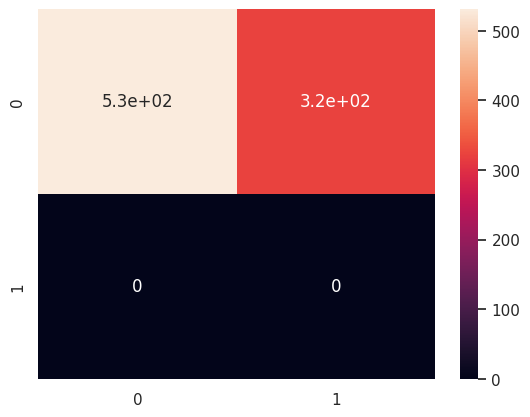

In [ ]:
sns.heatmap(cm_svc,annot=True)

In [ ]:
# Report of SVC
Report_svc=classification_report(y_pred_svc,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Support vactor machine could not have good accuracy it just predicted all Approved
print(Report_svc)

              precision    recall  f1-score   support

           0       1.00      0.62      0.77       854
           1       0.00      0.00      0.00         0

    accuracy                           0.62       854
   macro avg       0.50      0.31      0.38       854
weighted avg       1.00      0.62      0.77       854



### Support Vector Machine with Standard Scalar

In [ ]:
# Support vector machine with standerd scaler
svc.fit(X_train_scaled,y_train)

SVC()

In [ ]:
y_pred_svc_s=svc.predict(X_test_scaled)

In [ ]:
# Prediction wiith SVC using standerd scaler
y_pred_svc_s

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,

In [ ]:
# Accuracy score of SVC using Standerd Scaler
accuracy_score_svc_s=accuracy_score(y_pred_svc_s,y_test)

In [ ]:
print(accuracy_score_svc_s*100)

94.84777517564403


In [ ]:
# Confusion matrix of SVC with standerd scaler
cm_svc_s=confusion_matrix(y_pred_svc_s,y_test)

In [ ]:
cm_svc_s

array([[508,  21],
       [ 23, 302]])

In [ ]:
print(accuracy_score_svc*100)
print(accuracy_score_svc_s*100)

62.177985948477755
94.84777517564403


### Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# giving parameters to prevent overfitting
clf=RandomForestClassifier(criterion='gini',
                           max_depth=8,
                           min_samples_split=5,
                           random_state=2)


In [ ]:
# Training of dataset with the help of Random Forest
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=5, random_state=2)

In [ ]:
# it shows how much impotance your columns is with the help of gini index
clf.feature_importances_*100

array([ 0.39003589,  0.09488807,  0.10406512,  1.23912613,  2.27534004,
        6.44436461, 84.74680624,  1.13678691,  1.18022284,  1.27021953,
        1.11814462])

In [ ]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [ ]:
y_pred_clf=clf.predict(X_test)

In [ ]:
# Predictio of Random Forest
y_pred_clf

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,

In [ ]:
# Accuracy Score of Random Foests
accuracy_clf=accuracy_score(y_pred_clf,y_test)

In [ ]:
# Confusion Matrix of Radom Forest
cm_clf=confusion_matrix(y_pred_clf,y_test)

In [ ]:
cm_clf

array([[524,  10],
       [  7, 313]])

In [ ]:
# Classificatio report of Random Forest
Report_clf=classification_report(y_pred_clf,y_test)

In [ ]:
print(Report_clf)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       534
           1       0.97      0.98      0.97       320

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
print("Accuracy score of Random Forest:",accuracy_score(y_pred_clf,y_test)*100)

Accuracy score of Random Forest: 98.00936768149883


### Random Forest with Standard Scalar

In [ ]:
# Random forest using standard scalar
clf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=5, random_state=2)

In [ ]:
#prediction with Random Forest using standerd scalar
y_pred_clf_s=clf.predict(X_test_scaled)

In [ ]:
y_pred_clf_s

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,

In [ ]:
accuracy_clf_s=accuracy_score(y_pred_clf_s,y_test)

In [ ]:
accuracy_clf_s


0.9800936768149883

In [ ]:
print("Accuracy Score of random Forest with Standard Scalar:",accuracy_clf_s*100)

Accuracy Score of random Forest with Standard Scalar: 98.00936768149883


In [ ]:
# Confusion matrix of Random Forest using Standard Scalar
cm_clf_s=confusion_matrix(y_pred_clf_s,y_test)

In [ ]:
cm_clf_s

array([[524,  10],
       [  7, 313]])

In [ ]:
# report of random Forest with Standard scalar
Report_clf_s=classification_report(y_pred_clf_s,y_test)

In [ ]:
print(Report_clf_s)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       534
           1       0.97      0.98      0.97       320

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



# Results and Conclusion

In [ ]:
# The highest accuracy we got by using Random forest ,followed by Support vactor with Standard scalar and Logistic Regreesion using Standerd Scalar
# Random forest and random forest using standerd scalar got same accuracy
print("Accuracy of Logistic regression:",accuracy_lr*100)
print("Accuracy of Logistic Regression with Standard Scaler:",accuracy_lr_s*100)
print("Accuracy of Support vector MAchine:",accuracy_score_svc*100)
print("Accuracy of Support vector MAchine with standard scalar:",accuracy_score_svc_s*100)
print("Accuracy Score of random Forest :",accuracy_clf*100)
print("Accuracy Score of random Forest with Standard Scalar:",accuracy_clf_s*100)

Accuracy of Logistic regression: 73.88758782201405
Accuracy of Logistic Regression with Standard Scaler: 91.4519906323185
Accuracy of Support vector MAchine: 62.177985948477755
Accuracy of Support vector MAchine with standard scalar: 94.84777517564403
Accuracy Score of random Forest : 98.00936768149883
Accuracy Score of random Forest with Standard Scalar: 98.00936768149883
